<a href="https://colab.research.google.com/github/Pavan0704/Fake-vs-Real-News/blob/main/Fake_vs_Real_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

In [5]:
fake_df = pd.read_csv('Fake.csv')
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
true_df = pd.read_csv('True.csv')
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
fake_df.shape

(23481, 4)

In [8]:
true_df.shape

(21417, 4)

In [9]:
#Deleting unwanted columns
fake_df.drop(columns = ['title', 'subject', 'date'], inplace = True)
true_df.drop(columns = ['title', 'subject', 'date'], inplace = True)

In [10]:
fake_df.columns

Index(['text'], dtype='object')

In [11]:
true_df.columns

Index(['text'], dtype='object')

In [12]:
#Checking for null values
fake_df.isna().sum()

,0
text,0


In [13]:
true_df.isna().sum()

,0
text,0


In [14]:
fake_df.head()

,text
0,Donald Trump just couldn t wish all Americans ...
1,House Intelligence Committee Chairman Devin Nu...
2,"On Friday, it was revealed that former Milwauk..."
3,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis used his annual Christmas Day mes...


In [15]:
true_df['label'] = 0
fake_df['label'] = 1

In [16]:
true_df.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,0
1,WASHINGTON (Reuters) - Transgender people will...,0
2,WASHINGTON (Reuters) - The special counsel inv...,0
3,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,0


In [17]:
fake_df.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1


In [18]:
fake = fake_df.iloc[:5000]
true = true_df.iloc[:5000]

In [19]:
fake.shape, true.shape

((5000, 2), (5000, 2))

In [20]:
df = pd.concat([fake, true], axis = 0)

In [21]:
df.shape

(10000, 2)

In [22]:
#Text preprocessing
import spacy

nlp = spacy.load('en_core_web_sm')

In [23]:
#lemmatization
def lemmatization(text):
    doc = nlp(text)
    lemmaList = [word.lemma_ for word in doc]
    return ' '.join(lemmaList)

In [24]:
df['lemma'] = df['text'].apply(lemmatization)

In [25]:
df.head()

,text,label,lemma
0,Donald Trump just couldn t wish all Americans ...,1,Donald Trump just couldn t wish all Americans ...
1,House Intelligence Committee Chairman Devin Nu...,1,House Intelligence Committee Chairman Devin Nu...
2,"On Friday, it was revealed that former Milwauk...",1,"on Friday , it be reveal that former Milwaukee..."
3,"On Christmas day, Donald Trump announced that ...",1,"on Christmas day , Donald Trump announce that ..."
4,Pope Francis used his annual Christmas Day mes...,1,Pope Francis use his annual Christmas Day mess...


In [26]:
def remove_stopwords(text):
  doc = nlp(text)
  no_stopwords = [word.text for word in doc if not word.is_stop and not word.is_punct]
  return ' '.join(no_stopwords)

In [27]:
df['final'] = df['lemma'].apply(remove_stopwords)

In [28]:
df.head()

,text,label,lemma,final
0,Donald Trump just couldn t wish all Americans ...,1,Donald Trump just couldn t wish all Americans ...,Donald Trump couldn t wish Americans Happy New...
1,House Intelligence Committee Chairman Devin Nu...,1,House Intelligence Committee Chairman Devin Nu...,House Intelligence Committee Chairman Devin Nu...
2,"On Friday, it was revealed that former Milwauk...",1,"on Friday , it be reveal that former Milwaukee...",Friday reveal Milwaukee Sheriff David Clarke c...
3,"On Christmas day, Donald Trump announced that ...",1,"on Christmas day , Donald Trump announce that ...",Christmas day Donald Trump announce work ...
4,Pope Francis used his annual Christmas Day mes...,1,Pope Francis use his annual Christmas Day mess...,Pope Francis use annual Christmas Day message ...


In [38]:
#dividing the dataset
X = df['final']
y = df['label']

In [40]:
type(X), type(y)

(pandas.core.series.Series, pandas.core.series.Series)

In [41]:
X.head()

,final
0,Donald Trump couldn t wish Americans Happy New...
1,House Intelligence Committee Chairman Devin Nu...
2,Friday reveal Milwaukee Sheriff David Clarke c...
3,Christmas day Donald Trump announce work ...
4,Pope Francis use annual Christmas Day message ...


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [46]:
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((8000,), (8000,), (2000,), (2000,))

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

classifier = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('Random Forest', RandomForestClassifier(n_jobs = 1, random_state=42))
])

classifier.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_tfidf', TfidfVectorizer()),
                ('Random Forest',
                 RandomForestClassifier(n_jobs=1, random_state=42))])

In [51]:
classifier.score(X_test, y_test) * 100

99.9

In [52]:
pred= classifier.predict(X_test)

In [53]:
pred[:5]

array([0, 1, 1, 1, 1])

In [54]:
y_test[:5]

,label
1252,0
4684,1
1731,1
4742,1
4521,1


In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f'Model Accuracy: {accuracy_score(y_test, pred)*100}')

Model Accuracy: 99.9


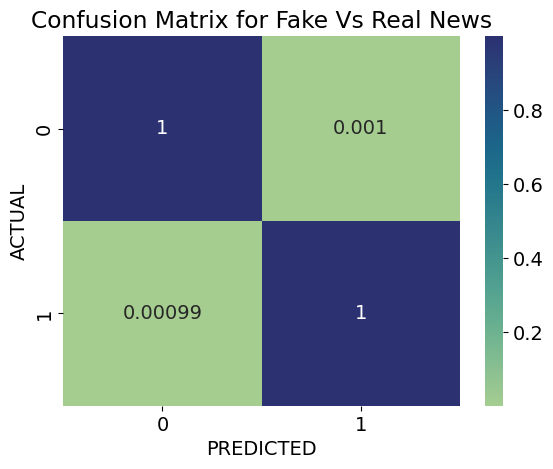

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

cf = confusion_matrix(y_test, pred, normalize='true')
sns.heatmap(cf, annot=True, cmap = 'crest');
plt.xlabel('PREDICTED');
plt.ylabel('ACTUAL');
plt.title('Confusion Matrix for Fake Vs Real News');